In [16]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [17]:
# Loading the dataset
df = pd.read_csv("glassdoor_jobs.csv")

In [18]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [19]:
df.shape

(956, 15)

In [20]:
# Returns basic statistics on numeric columns
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [21]:
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [22]:
# Removing the 'Unnamed' column
df.drop(labels='Unnamed: 0', axis='columns', inplace=True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [23]:
# Removing the rows having '-1' as Salary Estimate value
df = df[df['Salary Estimate'] != "-1"]

In [24]:
df.shape

(742, 14)

In [25]:
salary = df['Salary Estimate'].apply(lambda x:x.split("(")[0])

In [26]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [27]:
salary = salary.apply(lambda x: x.replace("$","").replace("K",""))
salary.unique()[380:]

array(['84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ', '57-109 ',
       '136-208 ', '171-272 ', '65-126 ', '118-228 ', '113-182 ',
       '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ', '32-57 ',
       '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [28]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))

Length of Salary:  416


In [29]:
# Creating column for 'Per Hour'
df['salary_per_hour'] = salary.apply(lambda x: 1 if "per hour" in x.lower() else 0)

In [30]:
df['salary_per_hour'].value_counts()

0    718
1     24
Name: salary_per_hour, dtype: int64

In [31]:
# Creating column for 'Employee Provided Salary'
df['emp_provided_salary'] = salary.apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)

In [32]:
df['emp_provided_salary'].value_counts()

0    725
1     17
Name: emp_provided_salary, dtype: int64

In [33]:
# Removing 'Per Hour' and 'Employer Provided Salary' from 'Salary Estimate' column
salary = salary.apply(lambda x: x.lower().replace("per hour", "").replace("employer provided salary:", "").replace(" ",""))
salary.unique()[380:]

array(['84-153', '44-73', '40-87', '72-142', '74-137', '57-109',
       '136-208', '171-272', '65-126', '118-228', '113-182', '58-104',
       '58-108', '81-161', '115-220', '71-144', '32-57', '79-136',
       '48-113', '27-47', '68-125', '39-67', '71-135', '61-123', '87-141',
       '71-121', '72-121', '51-88', '101-141', '79-127', '81-132',
       '120-140', '65-113', '59-125', '80-142', '62-113'], dtype=object)

In [34]:
# Creating column for min_salary
df["min_salary"] = salary.apply(lambda x: int(x.split("-")[0]))
df["min_salary"].head()

0    53
1    63
2    80
3    56
4    86
Name: min_salary, dtype: int64

In [35]:
# Creating column for max_salary
df["max_salary"] = salary.apply(lambda x: int(x.split("-")[1]))
df["max_salary"].head()

0     91
1    112
2     90
3     97
4    143
Name: max_salary, dtype: int64

In [36]:
# Creating column for average_salary
df["average_salary"] = (df["min_salary"]+df["max_salary"])/2

In [37]:
# Converting the hourly salaries to annual salaries
df['min_salary'] = df.apply(lambda x: x['min_salary']*8 if x['salary_per_hour'] == 1 else x['min_salary'], axis=1)

In [38]:
df['max_salary'] = df.apply(lambda x: x['max_salary']*8 if x['salary_per_hour'] == 1 else x['max_salary'], axis=1)

In [39]:
df[df['salary_per_hour'] == 1][['salary_per_hour','min_salary','max_salary']].head()

,salary_per_hour,min_salary,max_salary
197,1,136,192
209,1,168,272
240,1,144,200
247,1,168,272
257,1,120,200


In [40]:
df[['salary_per_hour','min_salary','max_salary']].head()

,salary_per_hour,min_salary,max_salary
0,0,53,91
1,0,63,112
2,0,80,90
3,0,56,97
4,0,86,143


In [41]:
# Removing numbers from 'Company Name' column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])
df["Company Name"].head(10)

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
5                                 CyrusOne
6                       ClearOne Advantage
7                               Logic20/20
8                Rochester Regional Health
9                                 <intent>
Name: Company Name, dtype: object

In [42]:
# Creating a column 'job_state'
df["job_state"] = df["Location"].apply(lambda x: x.split(',')[1])
df["job_state"].head()

0     NM
1     MD
2     FL
3     WA
4     NY
Name: job_state, dtype: object

In [43]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [44]:
# Fixing Los Angeles to CA
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
MI      6
KY      6
DE      6
GA      6
IA      5
CT      5
NE      4
OR      4
LA      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [45]:
df['job_state'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [46]:
# Calculating age of the companies
df["company_age"] = df['Founded'].apply(lambda x: x if x<1 else 2020-x)
df["company_age"].head()

0    47
1    36
2    10
3    55
4    22
Name: company_age, dtype: int64

In [47]:
# Cleaning the 'Job Description' column
df["python_job"] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df["r_job"] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df["spark_job"] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df["aws_job"] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df["excel_job"] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [48]:
# Python Jobs
df.python_job.value_counts()

1    392
0    350
Name: python_job, dtype: int64

In [49]:
# R Studio Jobs
df.r_job.value_counts()

0    741
1      1
Name: r_job, dtype: int64

In [50]:
# Spark Jobs
df.spark_job.value_counts()

0    575
1    167
Name: spark_job, dtype: int64

In [51]:
# AWS Jobs
df.aws_job.value_counts()

0    566
1    176
Name: aws_job, dtype: int64

In [52]:
# Excel Jobs
df.excel_job.value_counts()

1    388
0    354
Name: excel_job, dtype: int64

In [53]:
# Dataset till now
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,average_salary,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,NM,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,FL,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,NY,22,1,0,0,0,1


In [54]:
# Cleaning the 'Job Title' column
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

df['job_title_simplified'] = df['Job Title'].apply(title_simplifier)

In [55]:
df['job_title_simplified'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_title_simplified, dtype: int64

In [56]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

df['job_seniority'] = df['Job Title'].apply(seniority)

In [57]:
df['job_seniority'].value_counts()

na        520
senior    220
jr          2
Name: job_seniority, dtype: int64

In [58]:
df['Competitors'][3]

'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory'

In [59]:
# Cleaning 'Competitors' column
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: Competitors, Length: 742, dtype: int64

In [60]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: Type of ownership, dtype: int64

In [61]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()):
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

In [62]:
df['Type of ownership'].value_counts()

Private                           410
Public                            193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [63]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

In [64]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

In [65]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [66]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [67]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

In [68]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [69]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job,job_title_simplified,job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,72.0,NM,47,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,MD,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,...,85.0,FL,10,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,WA,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,...,114.5,NY,22,1,0,0,0,1,data scientist,na


In [70]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.00,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.00,2019.0
Competitors,742.0,1.053908,1.384239,0.0,0.0,0.0,3.00,4.0
salary_per_hour,742.0,0.032345,0.177034,0.0,0.0,0.0,0.00,1.0
emp_provided_salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.00,1.0
min_salary,742.0,78.625337,34.389918,15.0,54.0,72.0,96.75,216.0
max_salary,742.0,133.947439,48.507174,16.0,99.0,127.0,160.00,376.0
average_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.50,254.0
company_age,742.0,46.591644,53.778815,-1.0,11.0,24.0,59.00,276.0
python_job,742.0,0.528302,0.499535,0.0,0.0,1.0,1.00,1.0


Text(0.5, 1.0, 'Company Ratings Histogram')

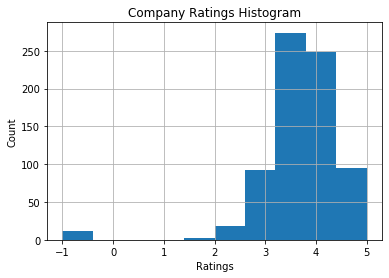

In [72]:
df['Rating'].hist()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title("Company Ratings Histogram")

Text(0.5, 1.0, 'Companies Age Histogram')

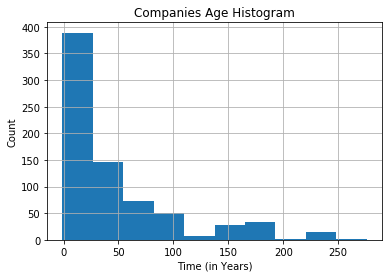

In [73]:
df['company_age'].hist()
plt.xlabel('Time (in Years)')
plt.ylabel('Count')
plt.title("Companies Age Histogram")

Text(0.5, 1.0, 'Average Salary Histogram')

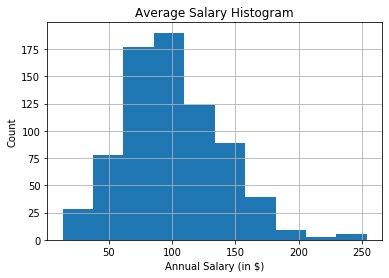

In [74]:
df['average_salary'].hist()
plt.xlabel('Annual Salary (in $)')
plt.ylabel('Count')
plt.title("Average Salary Histogram")

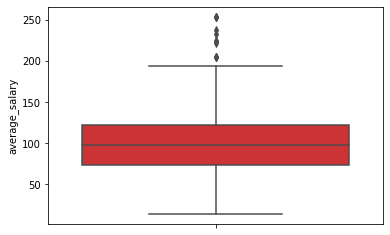

In [75]:
sns.boxplot(y='average_salary', data=df, orient='v', palette='Set1')

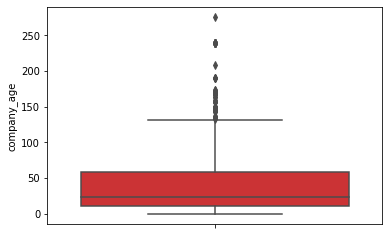

In [76]:
sns.boxplot(y='company_age', data=df, orient='v', palette='Set1')

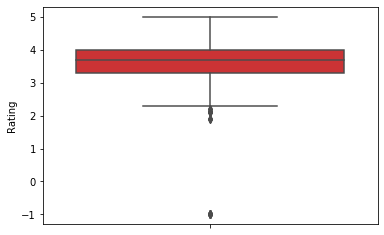

In [77]:
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')

In [78]:
# Finding Correlation between columns
df[['company_age','average_salary','Rating']].corr()

,company_age,average_salary,Rating
company_age,1.000000,0.019655,0.021655
average_salary,0.019655,1.000000,0.013492
Rating,0.021655,0.013492,1.000000


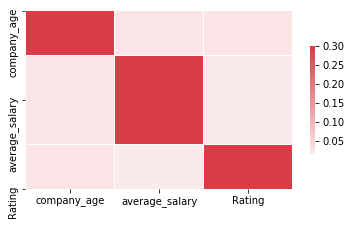

In [79]:
# Plotting the correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['company_age','average_salary','Rating']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [80]:
# Exploring categorical data
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority'],
      dtype='object')

In [81]:
df_categorical = df[['Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_title_simplified', 'job_seniority']]

Graph for Location
Total records = 20


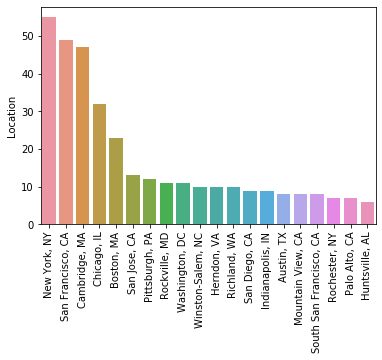

Graph for Headquarters
Total records = 20


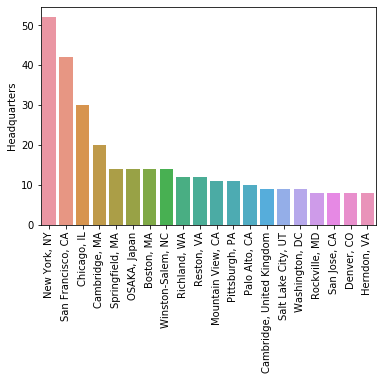

In [82]:
# Plotting the data for 'Location' and 'Headquarters' columns
for i in ['Location', 'Headquarters']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Company Name
Total records = 20


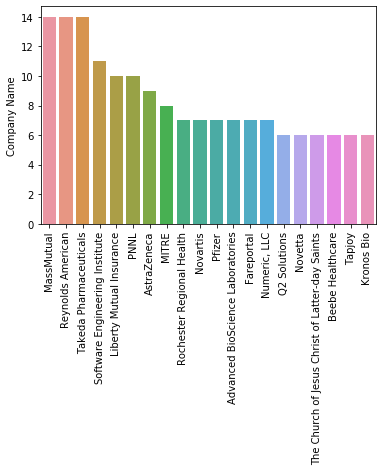

Graph for Size
Total records = 8


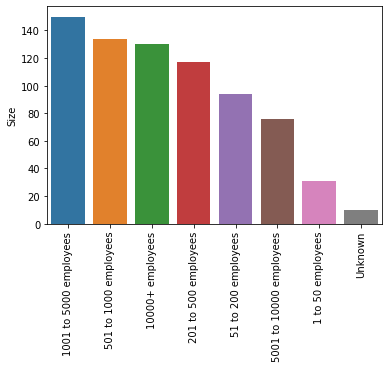

Graph for Type of ownership
Total records = 9


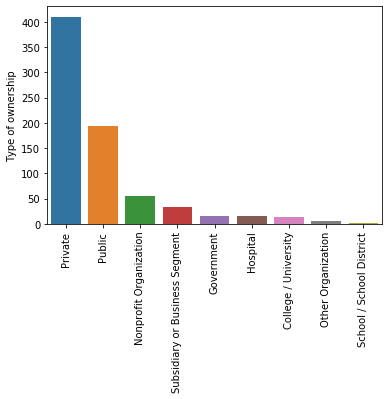

Graph for Revenue
Total records = 13


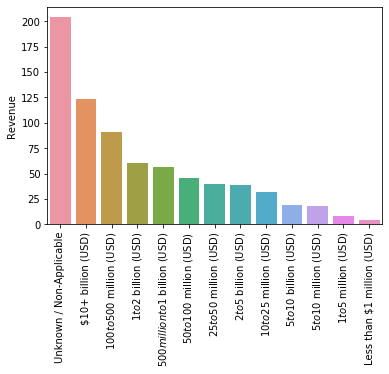

In [83]:
# Plotting the data for 'Company Name', 'Size', 'Type of ownership', 'Revenue' columns
for i in ['Company Name', 'Size', 'Type of ownership', 'Revenue']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Industry
Total records = 20


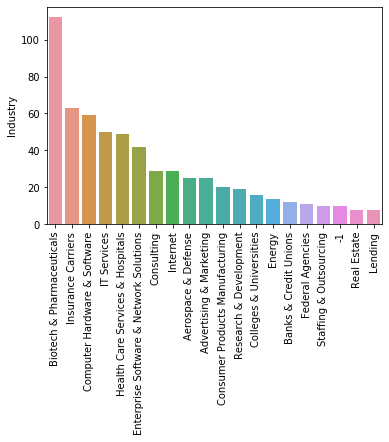

Graph for Sector
Total records = 20


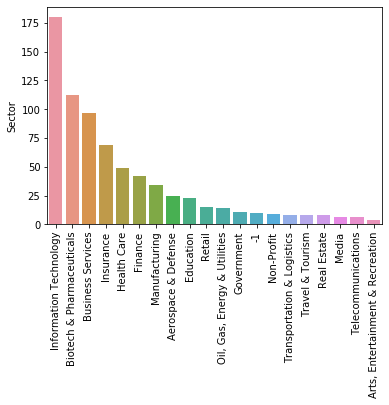

In [84]:
# Plotting the data for 'Industry', 'Sector' columns
for i in ['Industry', 'Sector']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for job_title_simplified
Total records = 7


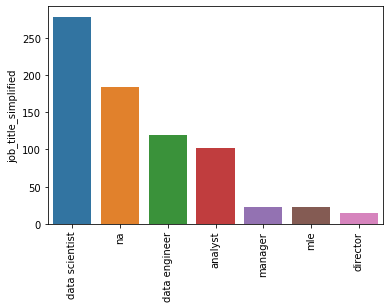

Graph for job_seniority
Total records = 3


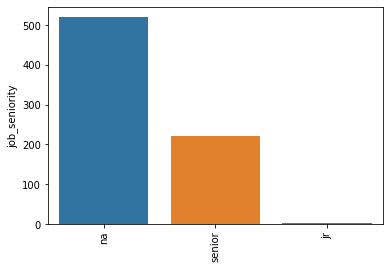

In [85]:
# Plotting the data for 'job_title_simplified', 'job_seniority' columns
for i in ['job_title_simplified', 'job_seniority']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [86]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority'],
      dtype='object')

In [87]:
pd.pivot_table(df, index=['job_title_simplified','job_seniority'], values='average_salary')

average_salary
job_title_simplified job_seniority                
analyst              jr                  56.500000
                     na                  61.155405
                     senior              79.092593
data engineer        na                  96.701220
                     senior             124.689189
data scientist       jr                 106.500000
                     na                 107.043011
                     senior             138.956522
director             na                 168.607143
manager              na                  84.022727
mle                  na                 119.133333
                     senior             142.071429
na                   na                  73.988189
                     senior             109.061404

In [88]:
pd.pivot_table(df, index=['job_state','job_title_simplified'], values='average_salary').sort_values('average_salary', ascending=False)[:20]

,,average_salary
job_state,job_title_simplified,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [89]:
pd.pivot_table(df, index='job_state', values='average_salary').sort_values('average_salary', ascending=False)[:15]

,average_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [90]:
# Top 15 Industries for Data Scientists
pd.pivot_table(df, index='Industry', values='average_salary').sort_values('average_salary', ascending=False)[:15]

,average_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [91]:
# Top 10 Sectors for Data Scientists
pd.pivot_table(df, index='Sector', values='average_salary').sort_values('average_salary', ascending=False)[:10]

,average_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [92]:
# Top Company types that pay Data Scientists well
pd.pivot_table(df, index='Type of ownership', values='average_salary').sort_values('average_salary', ascending=False)[:10]

,average_salary
Type of ownership,
Public,110.893782
Subsidiary or Business Segment,110.573529
College / University,107.615385
Private,101.776829
Government,84.300000
Other Organization,77.900000
School / School District,77.750000
Nonprofit Organization,68.281818
Hospital,54.000000


In [93]:
# Top 20 Companies that pay Data Scientists well
pd.pivot_table(df, index='Company Name', values='average_salary').sort_values('average_salary', ascending=False)[:20]

,average_salary
Company Name,
Gallup,237.5
Sage Intacct,232.5
CA-One Tech Cloud,225.0
Grand Rounds,221.5
Credit Sesame,205.0
The Climate Corporation,194.0
Grainger,179.5
Samsung Research America,177.0
Nektar Therapeutics,174.0


# **Feature Engineering**
Trimming Columns

In [94]:
# Trimming the 'Industry' column

# Taking top 11 Industries and replacing others by 'Others'
industry_list = ['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 
                 'Enterprise Software & Network Solutions', 'Consulting', 'Internet', 'Advertising & Marketing', 'Aerospace & Defense', 'Consumer Products Manufacturing']

def industry_simplifier(text):
  if text not in industry_list:
    return 'Others'
  else:
    return text

df['Industry'] = df['Industry'].apply(industry_simplifier)

In [96]:
# Trimming the 'job_state' column

# Taking top 10 States and replacing others by 'Others'
job_state_list = ['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA']

def job_state_simplifier(text):
  if text not in job_state_list:
    return 'Others'
  else:
    return text

df['job_state'] = df['job_state'].apply(job_state_simplifier)

In [97]:
# Adding column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [98]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority', 'job_in_headquarters'],
      dtype='object')

In [100]:
# Choosing relevant columns
df_model = df.copy(deep=True)
df_model = df_model[['average_salary', 'Rating', 'company_age', 'Size', 'Type of ownership', 'Industry', 'Revenue', 'Competitors',
               'job_title_simplified', 'job_seniority', 'job_state', 'job_in_headquarters', 'python_job', 'spark_job', 'aws_job', 'excel_job', ]]

In [101]:
# Renaming columns
df_model.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Type of ownership':'type_of_ownership',
                         'Industry':'industry', 'Revenue':'revenue', 'Competitors':'competitors'}, inplace=True)

In [103]:
df_model.columns

Index(['average_salary', 'company_rating', 'company_age', 'company_size',
       'type_of_ownership', 'industry', 'revenue', 'competitors',
       'job_title_simplified', 'job_seniority', 'job_state',
       'job_in_headquarters', 'python_job', 'spark_job', 'aws_job',
       'excel_job'],
      dtype='object')

In [104]:
df_model.head(2)

,average_salary,company_rating,company_age,company_size,type_of_ownership,industry,revenue,competitors,job_title_simplified,job_seniority,job_state,job_in_headquarters,python_job,spark_job,aws_job,excel_job
0,72.0,3.8,47,501 to 1000 employees,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,na,Others,0,1,0,0,1
1,87.5,3.4,36,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),0,data scientist,na,MD,0,1,0,0,0


# Handling Ordinal Categorical Features

In [105]:
# Mapping ranks to 'company_size' columns since it is ordinal categorical feature
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_model['company_size_rank'] = df_model['company_size'].map(size_map)
df_model.drop('company_size', axis=True, inplace=True)

In [106]:
# Mapping ranks to 'revenue	' columns since it is ordinal categorical feature
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11, '$10+ billion (USD)':12}

df_model['company_revenue_rank'] = df_model['revenue'].map(revenue_map)
df_model.drop('revenue', axis=True, inplace=True)

In [107]:
# Mapping ranks to 'job_seniority	' columns since it is ordinal categorical feature
job_seniority_map = {'na': 0, 'jr': 1, 'senior': 2}

df_model['job_seniority_rank'] = df_model['job_seniority'].map(job_seniority_map)
df_model.drop('job_seniority', axis=True, inplace=True)

# Handling Nominal Categorical Features

In [108]:
# Removing 'type_of_ownership' column using get_dummies()
df_model = pd.get_dummies(columns=['type_of_ownership'], data=df_model)
df_model.shape

(742, 24)

In [109]:
# Removing 'industry' column using get_dummies()
df_model = pd.get_dummies(columns=['industry'], data=df_model)
df_model.shape

(742, 35)

In [110]:
# Removing 'job_title_simplified' column using get_dummies()
df_model = pd.get_dummies(columns=['job_title_simplified'], data=df_model)
df_model.shape

(742, 41)

In [111]:
# Removing 'job_state' column using get_dummies()
df_model = pd.get_dummies(columns=['job_state'], data=df_model)
df_model.shape

(742, 51)

# Featuring Scaling

In [112]:
df_model.head()

,average_salary,company_rating,company_age,competitors,job_in_headquarters,python_job,spark_job,aws_job,excel_job,company_size_rank,...,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Others,job_state_PA,job_state_TX,job_state_VA,job_state_WA
0,72.0,3.8,47,0,0,1,0,0,1,4,...,0,0,0,0,0,1,0,0,0,0
1,87.5,3.4,36,0,0,1,0,0,0,7,...,0,0,1,0,0,0,0,0,0,0
2,85.0,4.8,10,0,1,1,1,0,1,4,...,0,0,0,0,0,1,0,0,0,0
3,76.5,3.8,55,3,1,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1
4,114.5,2.9,22,3,1,1,0,0,1,2,...,0,0,0,0,1,0,0,0,0,0


In [113]:
# Dataset after Feature Engineering
df_model.shape

(742, 51)

In [114]:
X = df_model.drop('average_salary', axis=1)
y = df_model['average_salary']

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['company_rating', 'competitors', 'company_age', 'company_size_rank', 'company_revenue_rank']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [116]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set size: {} and Testing set size: {}".format(X_train.shape, X_test.shape))

Training set size: (593, 50) and Testing set size: (149, 50)


# Model Building
Linear Regression

In [117]:
# Creating linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [118]:
# Fitting the dataset to the model
lr_model.fit(X_train, y_train)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(lr_model.score(X_train, y_train),4)*100, round(lr_model.score(X_test, y_test),4)*100))

Accuracy of the Linear Regression Model on Training set is : 57.879999999999995% and on Test set is 60.69%


In [119]:
# Creating decision tree regression model
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(criterion='mse', max_depth=11, random_state=42)

In [120]:
# Fitting the dataset to the model
decision_model.fit(X_train, y_train)
print("Accuracy of the Decision Tree Regression Model on Training set is : {}% and on Test set is {}%".format(round(decision_model.score(X_train, y_train),4)*100, round(decision_model.score(X_test, y_test),4)*100))

Accuracy of the Decision Tree Regression Model on Training set is : 93.17% and on Test set is 75.57000000000001%


In [121]:
# Creating random forest regression model
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)

In [122]:
# Fitting the dataset to the model
forest_model.fit(X_train, y_train)
print("Accuracy of the Random Forest Regression Model on Training set is : {}% and on Test set is {}%".format(round(forest_model.score(X_train, y_train),4)*100, round(forest_model.score(X_test, y_test),4)*100))

Accuracy of the Random Forest Regression Model on Training set is : 95.25% and on Test set is 76.59%


In [123]:
# Creating AdaBoost regression model
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=42)

In [124]:
# Fitting the dataset to the model
adb_model.fit(X_train, y_train)
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(round(adb_model.score(X_train, y_train),4)*100, round(adb_model.score(X_test, y_test),4)*100))

Accuracy of the AdaBoost Regression Model on Training set is : 96.58% and on Test set is 78.62%
